In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("/content/train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [4]:
import pandas as pd 

titanic.groupby(['Sex'])["Survived"].count().mean()
Mean_encoded_subject = titanic.groupby(['Sex'])['Survived'].mean().to_dict() 
  
titanic['Sex'] =  titanic['Sex'].map(Mean_encoded_subject) 
  
print(titanic)


     PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0              1         0       3  ...   7.2500    NaN         S
1              2         1       1  ...  71.2833    C85         C
2              3         1       3  ...   7.9250    NaN         S
3              4         1       1  ...  53.1000   C123         S
4              5         0       3  ...   8.0500    NaN         S
..           ...       ...     ...  ...      ...    ...       ...
886          887         0       2  ...  13.0000    NaN         S
887          888         1       1  ...  30.0000    B42         S
888          889         0       3  ...  23.4500    NaN         S
889          890         1       1  ...  30.0000   C148         C
890          891         0       3  ...   7.7500    NaN         Q

[891 rows x 12 columns]


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.

In [5]:
titanic = titanic.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)

embarked = titanic.iloc[:,-1:].values

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

embarked[:,0] = lb.fit_transform(embarked[:,0]).astype(str)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

embarked = ohe.fit_transform(embarked)

print(embarked)



[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.



In [6]:

cabin = titanic.iloc[:,10:11].values

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cabin[:,0] = lb.fit_transform(cabin[:,0]).astype(str)

print(cabin)

[['13']
 ['5']
 ['12']
 ['11']
 ['7']
 ['4']
 ['1']
 ['8']
 ['11']
 ['5']
 ['3']
 ['3']
 ['10']
 ['6']
 ['0']
 ['12']
 ['1']
 ['3']
 ['3']
 ['2']
 ['9']
 ['7']]


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

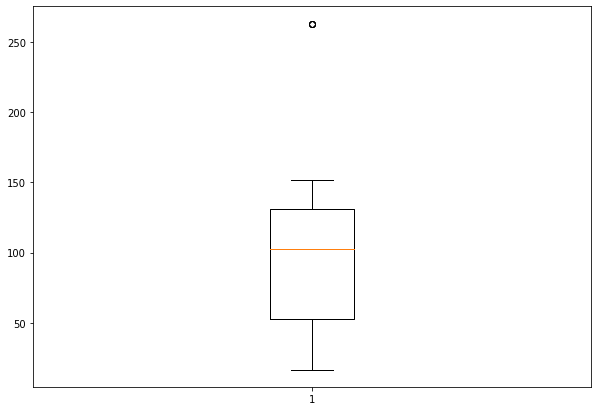

In [7]:
import matplotlib.pyplot as plt 
fare = titanic.Fare
fig = plt.figure(figsize =(10, 7)) 
  
plt.boxplot(fare) 
  
# show plot 
plt.show()


Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.



In [8]:
from scipy.stats import zscore

z_score_scipy =zscore(titanic["Fare"])

len(list(z_score_scipy))

22

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [9]:
x_df_zscore_replaced_all = titanic.copy()
z_score = zscore(titanic["Fare"])
upper_replace_value = titanic[z_score<=3]["Fare"].max()
lower_replace_value = titanic[z_score>=-3]["Fare"].min()
x_df_zscore_replaced_all = titanic.copy()
x_df_zscore_replaced_all["Fare"][z_score>3] = upper_replace_value
x_df_zscore_replaced_all["Fare"][z_score<-3] = lower_replace_value
x_df_zscore_replaced_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0.742038,4.00,1.0,1.0,PP 9549,16.7000,G6,S
1,89,1.0,1,"Fortune, Miss. Mabel Helen",0.742038,23.00,3.0,2.0,19950,263.0000,C23 C25 C27,S
2,184,1.0,2,"Becker, Master. Richard F",0.188908,1.00,2.0,1.0,230136,39.0000,F4,S
3,194,1.0,2,"Navratil, Master. Michel M",0.188908,3.00,1.0,1.0,230080,26.0000,F2,S
4,249,1.0,1,"Beckwith, Mr. Richard Leonard",0.188908,37.00,1.0,1.0,11751,52.5542,D35,S
5,306,1.0,1,"Allison, Master. Hudson Trevor",0.188908,0.92,1.0,2.0,113781,151.5500,C22 C26,S
6,312,1.0,1,"Ryerson, Miss. Emily Borie",0.742038,18.00,2.0,2.0,PC 17608,262.3750,B57 B59 B63 B66,C
7,320,1.0,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",0.742038,40.00,1.0,1.0,16966,134.5000,E34,C
8,341,1.0,2,"Navratil, Master. Edmond Roger",0.188908,2.00,1.0,1.0,230080,26.0000,F2,S
9,342,1.0,1,"Fortune, Miss. Alice Elizabeth",0.742038,24.00,3.0,2.0,19950,263.0000,C23 C25 C27,S


Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [10]:
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)

iqr = q3-q1
iqr

78.32079999999999

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [11]:
from scipy import stats 
iqr = stats.iqr(titanic["Fare"]) 
iqr 
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-64.92699999999999, 248.3562)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [12]:
lower_limit = titanic["Fare"].quantile(q=0.01)
upper_limit = titanic["Fare"].quantile(q=0.99)
lower_limit, upper_limit


(18.653, 263.0)

In [17]:

x_df= pd.read_csv("/content/train.csv")


In [ ]:

x_df["Fare"][x_df["Fare"] > upper_limit] = upper_limit
x_df["Fare"][x_df["Fare"] < lower_limit] = lower_limit

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [21]:
x_df["Fare"] .min(), x_df["Fare"] .max(), x_df.shape

(18.653, 263.0, (891, 12))

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [22]:
print("Hard Edges yöntemi upper limit ve lower limit değerlerini karşılaştırılan diğer iki yönteme göre daha iyi  optimize etmiştir.")

Hard Edges yöntemi upper limit ve lower limit değerlerini karşılaştırılan diğer iki yönteme göre daha iyi  optimize etmiştir.
